### EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from db_connection import get_engine
from dotenv import load_dotenv

engine = get_engine()

import warnings
warnings.filterwarnings('ignore')
print('Done!')

C:\Users\HP\Desktop\Blossom_Academy\venv_pycaret\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Done
Done!


In [6]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Done!")

Done!


In [ ]:
# loaded_data = pd.read_csv('data/Churn_Modelling.csv')
# churn_data = loaded_data.copy()
# display(churn_data.head())

In [7]:

# load data
loaded_data = pd.read_sql("SELECT * FROM customers", engine)
churn_data = loaded_data.copy()
display(churn_data.head())

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# loaded_data = pd.read_csv('data/Churn_Modelling.csv')
# churn_data = loaded_data.copy()
# display(churn_data.head())

In [8]:

print(" EXPLORATORY DATA ANALYSIS")
print("==" * 40)

# target variable: churn distribution

print("\n1. TARGET VARIABLE ANALYSIS")
print("-" * 40)

# Calculate churn statistics
churn_rate = churn_data['exited'].mean() * 100
churn_counts = churn_data['exited'].value_counts()

print(f"- Total Customers: {churn_data['customerid'].nunique():}")
# print(churn_counts)
# print(churn_rate)
print(f"- Churned Customers: {churn_counts[1]:,} ({churn_rate:.1f}%)")
print(f"- Retained Customers: {churn_counts[0]:,} ({100-churn_rate:.1f}%)")
print(f"- Imbalance Ratio: {churn_counts[0]/churn_counts[1]:.1f} (retained:churned)")

 EXPLORATORY DATA ANALYSIS

1. TARGET VARIABLE ANALYSIS
----------------------------------------
- Total Customers: 10000
- Churned Customers: 2,037 (20.4%)
- Retained Customers: 7,963 (79.6%)
- Imbalance Ratio: 3.9 (retained:churned)


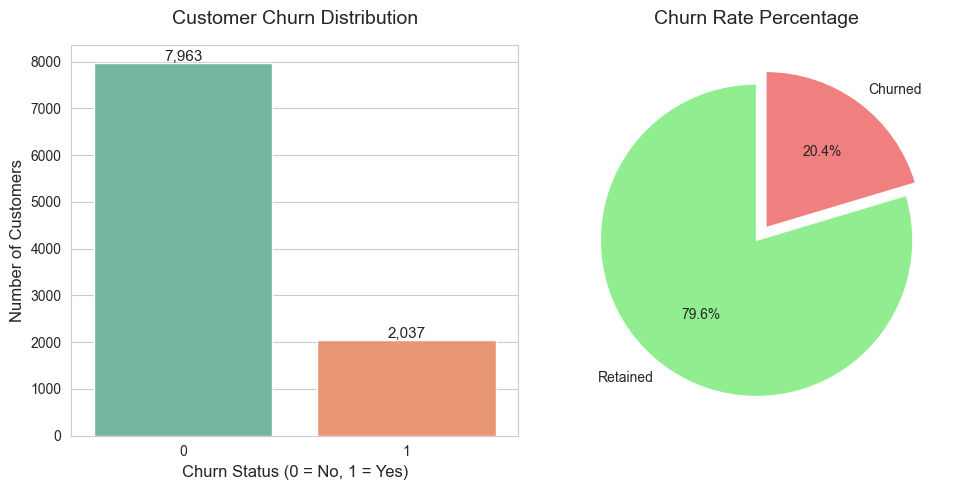

In [9]:

# visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# # bar chart showing the count of churned and retained customers
sns.countplot(x='exited', data=churn_data, ax=axes[0], palette='Set2')
axes[0].set_title('Customer Churn Distribution', fontsize=14, pad=15)
axes[0].set_xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)

# # add count values on top of each bar for clarity
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}', 
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=11)

# pie chart to show churn percentage

labels = ['Retained', 'Churned']
sizes = [churn_counts[0], churn_counts[1]]
colors = ['lightgreen', 'lightcoral']
axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            startangle=90, explode=(0, 0.1))
axes[1].set_title('Churn Rate Percentage', fontsize=14, pad=15)


# adjust layout before displaying
plt.tight_layout()
plt.savefig("images/customer_churn_distribution.png", dpi=300)
plt.show()


 categorical variable impact on churn
----------------------------------------


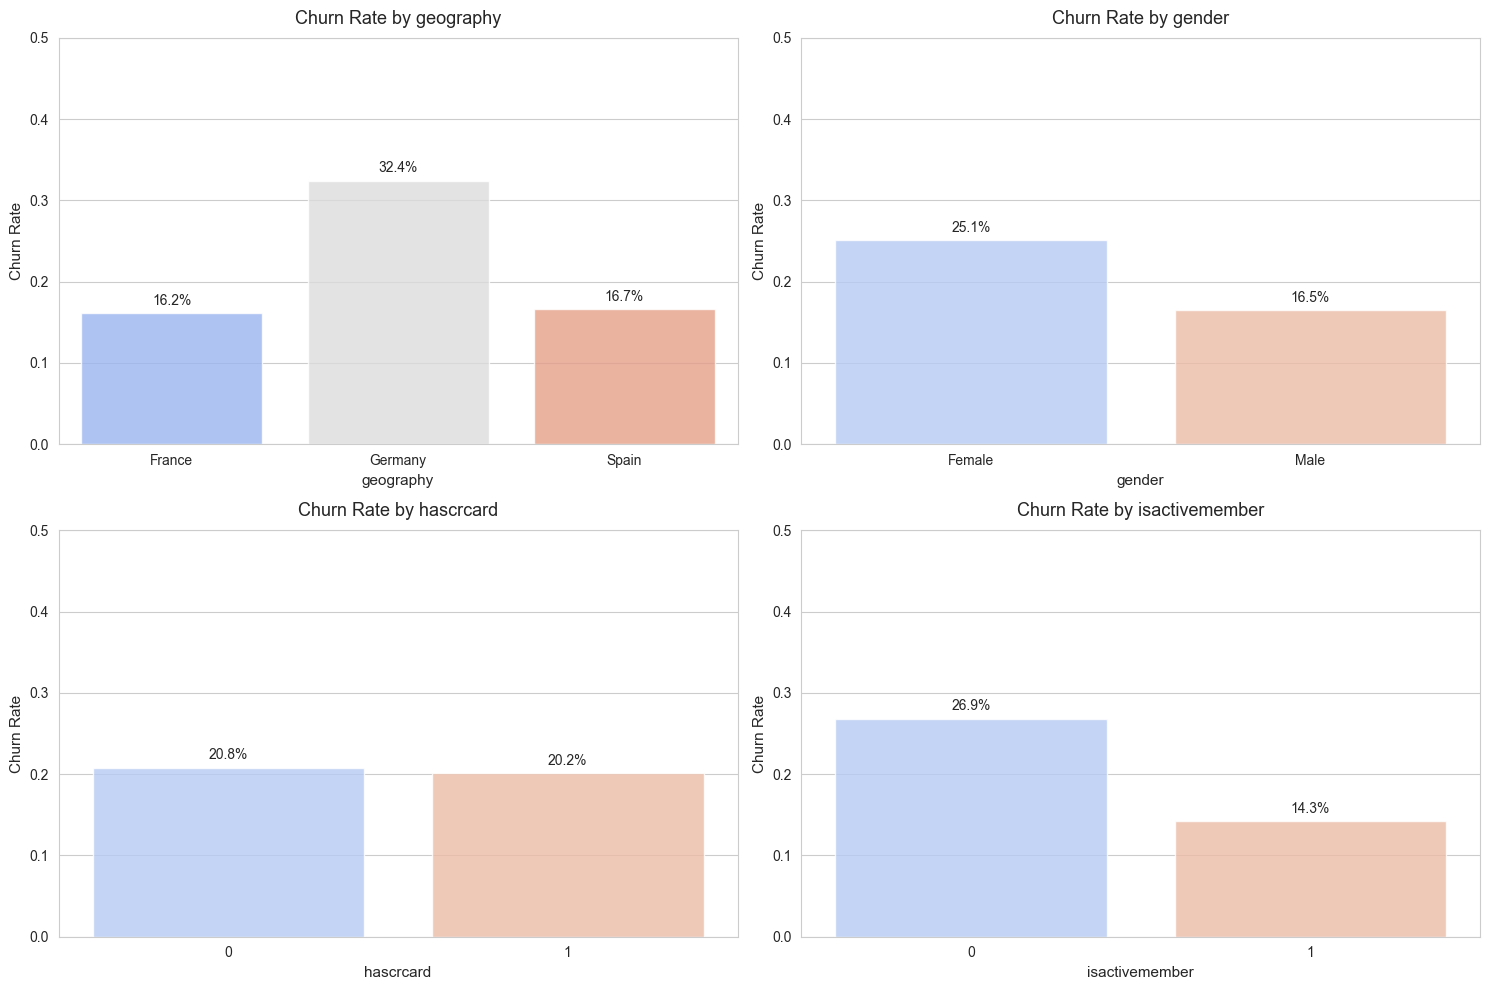

In [10]:

# check how categorical variables relate to churn

print("\n categorical variable impact on churn")
print("-" * 40)

# categorical features to analyze

categorical_vars = ['geography', 'gender', 'hascrcard', 'isactivemember']

# visualize churn rates for categorical variables

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    # Calculate churn rate per category
    churn_rate_df = churn_data.groupby(var)['exited'].mean().reset_index()
    
    #bar plot of churn rate by category
    sns.barplot(x=var, y='exited', data=churn_rate_df, 
                ax=axes[i], palette='coolwarm', alpha=0.8)
    
    axes[i].set_title(f'Churn Rate by {var}', fontsize=13, pad=10)
    axes[i].set_xlabel(var, fontsize=11)
    axes[i].set_ylabel('Churn Rate', fontsize=11)
    axes[i].set_ylim(0, 0.5)  # Consistent scale for comparison
    
    # Add percentage labels
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width()/2., height + 0.01,
                    f'{height:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


 ===========numerical variable impact on churn===============


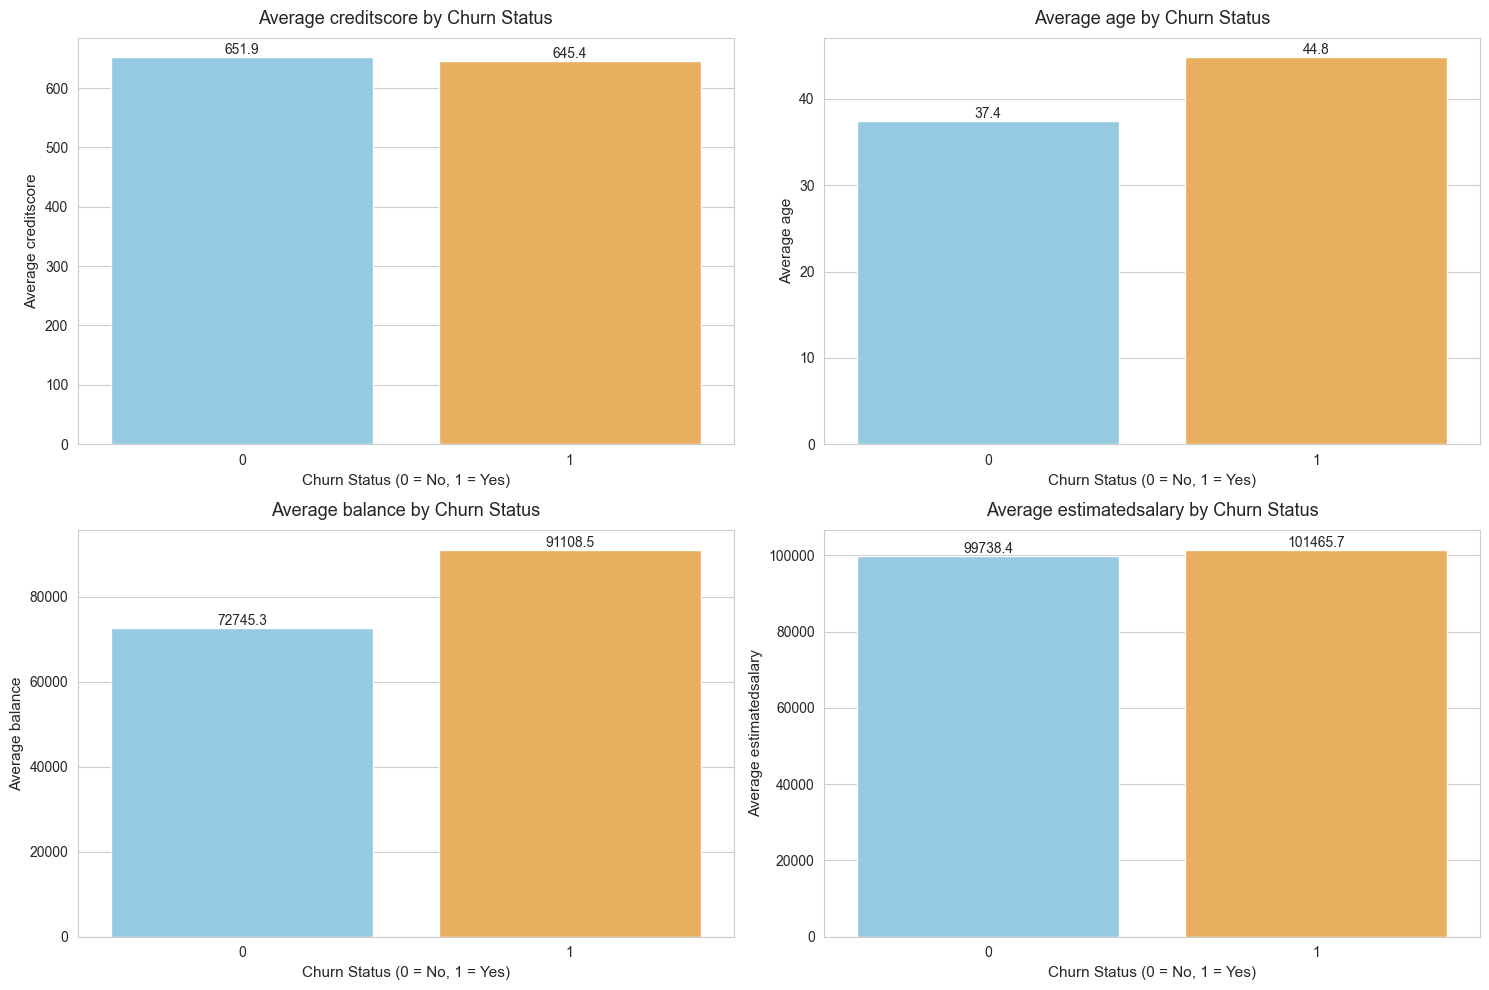

In [13]:

# numerical variable impact on churn

print("\n ===========numerical variable impact on churn===============")

numerical_vars = ['creditscore', 'age', 'balance', 'estimatedsalary']


# visualize mean values using simple bar charts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    # prepare mean values per churn group
    mean_df = churn_data.groupby('exited')[var].mean().reset_index()
    
    # bar chart of average values
    
    sns.barplot(
        x='exited',
        y=var,
        data=mean_df,
        ax=axes[i],
        palette = ['#89CFF0', '#FFB347'] # light sky blue vs soft orange
    )
    
    axes[i].set_title(f'Average {var} by Churn Status', fontsize=13, pad=10)
    axes[i].set_xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=11)
    axes[i].set_ylabel(f'Average {var}', fontsize=11)
    
    # add values on top of bars
    
    for p in axes[i].patches:
        axes[i].annotate(
            f'{p.get_height():.1f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.savefig("images/churn_by_numeric+variables.png", dpi=300)
plt.show()



### CORRELATION ANALYSIS


 ======================CORRELATION ANALYSIS======================


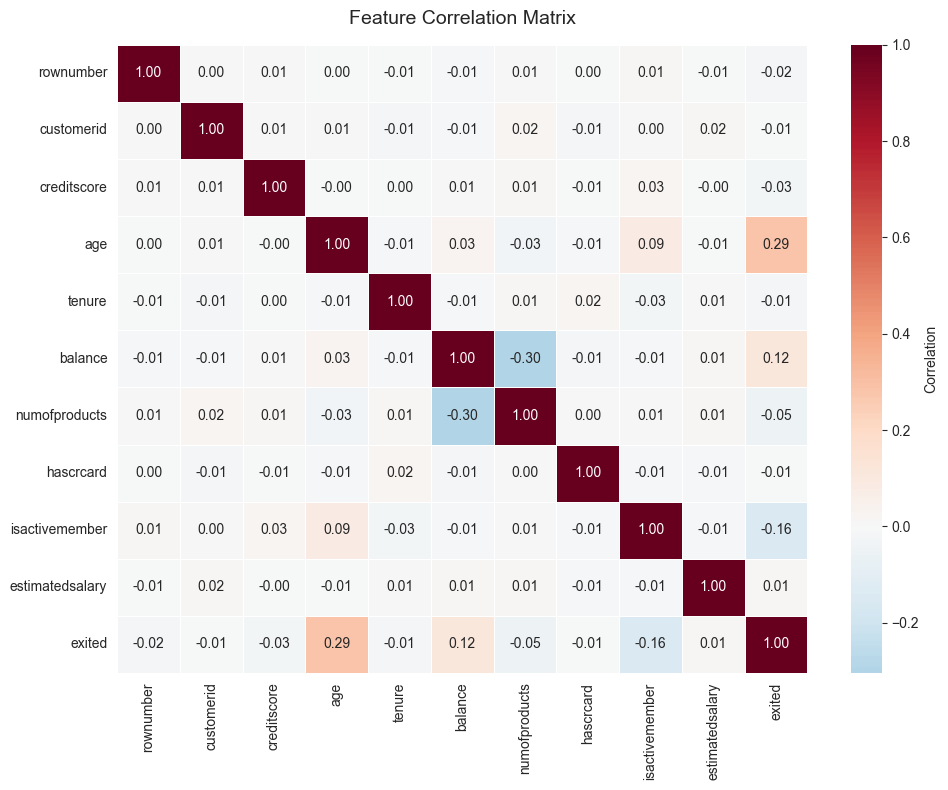

In [8]:


print("\n ======================CORRELATION ANALYSIS======================")

# only keep numeric columns and calculate correlations
correlation_matrix = churn_data.select_dtypes(include=[np.number]).corr()


# plot a heatmap of all correlations
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,          # show numbers
    cmap='RdBu_r',       # red = positive, blue = negative
    center=0,            # center the colormap at 0
    fmt='.2f',           # show 2 decimal places
    linewidths= 0.5,      # lines between squares
    cbar_kws={'label': 'Correlation'}  # label for color bar
)
plt.title('Feature Correlation Matrix', fontsize=14, pad=15)
plt.tight_layout()
plt.show()


## Prepare Age Group churn DataFrame


-CSV saved as age_group_churn.csv


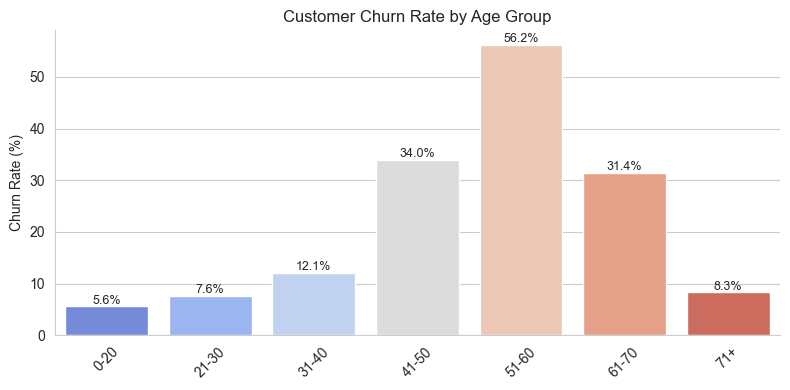

In [18]:
# --- define age ranges ---
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
churn_data['Age_Group'] = pd.cut(churn_data['age'], bins=bins, labels=labels, right=True)

# --- calculate churn by age group ---
age_churn = churn_data.groupby('Age_Group')['exited'].mean() * 100

# --- Save to CSV ---
age_churn_df = age_churn.reset_index()
age_churn_df.columns = ['Age_Range', 'Churn_Rate (%)']
age_churn_df.to_csv('age_group_churn.csv', index=False)
print("\n-CSV saved as age_group_churn.csv")

# --- minimalist chart ---
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")  

# barplot
sns.barplot(x='Age_Range', y='Churn_Rate (%)', data=age_churn_df, palette='coolwarm')

# add labels on top of bars
for index, row in age_churn_df.iterrows():
    plt.text(index, row['Churn_Rate (%)'] + 0.5, f"{row['Churn_Rate (%)']:.1f}%", ha='center', fontsize=9)

# Minimalist styling
plt.title('Customer Churn Rate by Age Group', fontsize=12)
plt.xlabel('')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
sns.despine()  # removes top and right spines for clean look

plt.tight_layout()
plt.savefig("images/customer_churn_by_age.png", dpi=300)
plt.show()


## Calculate balance churn


 CSV saved as balance_churn.csv


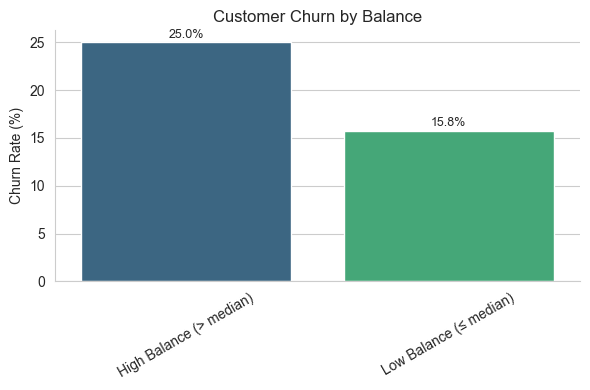

In [22]:
# --- Calculate balance churn ---
high_balance = churn_data[churn_data['balance'] > churn_data['balance'].median()]
low_balance = churn_data[churn_data['balance'] <= churn_data['balance'].median()]

high_balance_churn = high_balance['exited'].mean() * 100
low_balance_churn = low_balance['exited'].mean() * 100

balance_churn_df = pd.DataFrame({
    'Balance_Type': ['High Balance (> median)', 'Low Balance (≤ median)'],
    'Churn_Rate (%)': [high_balance_churn, low_balance_churn]
})

# --- Save CSV ---
balance_churn_df.to_csv('balance_churn.csv', index=False)
print("\n CSV saved as balance_churn.csv")

# --- Minimalist Bar Chart ---
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")  # clean background

sns.barplot(x='Balance_Type', y='Churn_Rate (%)', data=balance_churn_df, palette='viridis')

# Add values on top of bars
for index, row in balance_churn_df.iterrows():
    plt.text(index, row['Churn_Rate (%)'] + 0.5, f"{row['Churn_Rate (%)']:.1f}%", ha='center', fontsize=9)

# Minimalist styling
plt.title('Customer Churn by Balance', fontsize=12)
plt.ylabel('Churn Rate (%)')
plt.xlabel('')
plt.xticks(rotation=30)
sns.despine()  # remove top and right spines

plt.tight_layout()
plt.show()


In [21]:
balance_churn = pd.read_csv("balance_churn.csv")
balance_churn

,Balance_Type,Churn_Rate (%)
0,High Balance (> median),24.98
1,Low Balance (≤ median),15.76


## prepare data with no labels to test model

In [24]:
# --- Load data ---
df = pd.read_csv("data/Churn_Modelling.csv")

# --- Take first 100 rows ---
churn_100_data = df.copy()
churn_100_data = churn_100_data.iloc[:100]

# --- Drop unwanted columns ---
churn_100_data.drop(['RowNumber', 'Exited', 'Surname'], axis=1, inplace=True)

# --- Convert column names to lowercase ---
churn_100_data.columns = [col.lower() for col in churn_100_data.columns]

# --- Save to CSV ---
churn_100_data.to_csv("data/no_label_churn_data.csv", index=False)

# --- Display ---
display(churn_100_data.head())
print(churn_100_data.shape)
print("\n\nDone!")


,customerid,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


(100, 11)


Done!
